## Spaceship Titanic

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.4)

# 한글 폰트 조정
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

# Spaceship Titanic 형식 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape :", train.shape)
print("Test shape  :", test.shape)

train.head()

Train shape : (8693, 14)
Test shape  : (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
train.info()
print()
print("-" * 50)
print()
test.info()

train.describe(include='all').T


"""
PassengerId: 8693 non-null → 8693 - 8693 = 0개 결측.
HomePlanet: 8492 non-null → 8693 - 8492 = 201개 결측.
CCryoSleep: 8476 non-null → 8693 - 8476 = 217개 결측.
CCabin: 8494 non-null → 8693 - 8494 = 199개 결측.
DDestination: 8511 non-null → 8693 - 8511 = 182개 결측.
AAge: 8514 non-null → 8693 - 8514 = 179개 결측.
VVIP: 8490 non-null → 8693 - 8490 = 203개 결측.
RRoomService: 8512 non-null → 8693 - 8512 = 181개 결측.
FFoodCourt: 8510 non-null → 8693 - 8510 = 183개 결측.
ShoppingMall: 8485 non-null → 8693 - 8485 = 208개 결측.
SSpa: 8510 non-null → 8693 - 8510 = 183개 결측.
VRDeck: 8505 non-null → 8693 - 8505 = 188개 결측.
Name: 8493 non-null → 8693 - 8493 = 200개 결측.
Transported: 8693 non-null → 0개 결측.
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (t

'\nPassengerId: 8693 non-null → 8693 - 8693 = 0개 결측.\nHomePlanet: 8492 non-null → 8693 - 8492 = 201개 결측.\nCCryoSleep: 8476 non-null → 8693 - 8476 = 217개 결측.\nCCabin: 8494 non-null → 8693 - 8494 = 199개 결측.\nDDestination: 8511 non-null → 8693 - 8511 = 182개 결측.\nAAge: 8514 non-null → 8693 - 8514 = 179개 결측.\nVVIP: 8490 non-null → 8693 - 8490 = 203개 결측.\nRRoomService: 8512 non-null → 8693 - 8512 = 181개 결측.\nFFoodCourt: 8510 non-null → 8693 - 8510 = 183개 결측.\nShoppingMall: 8485 non-null → 8693 - 8485 = 208개 결측.\nSSpa: 8510 non-null → 8693 - 8510 = 183개 결측.\nVRDeck: 8505 non-null → 8693 - 8505 = 188개 결측.\nName: 8493 non-null → 8693 - 8493 = 200개 결측.\nTransported: 8693 non-null → 0개 결측.\n'

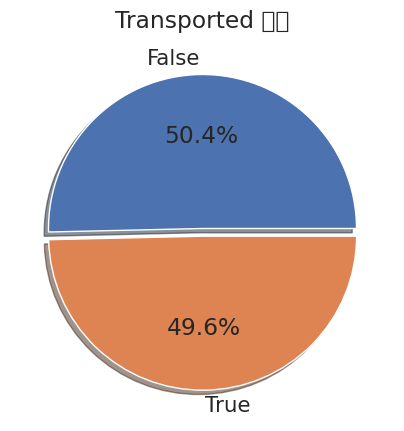

'\n- 클래스 불균형 처리 생략 가능\n  > Oversampling(SMOTE), undersampling, 클래스 가중치 조정 등\n- accuracy를 주요 지표로 사용 가능\n- train/validation 분할은 stratify=y로 유지하며, 특별한 비율 보정 불요\n'

In [19]:
# 클래스에 대한 불균형 여부 파악

train["Transported"].value_counts(normalize=True)

plt.figure(figsize=(5, 5))
labels = ['False', 'True']
train['Transported'].value_counts().plot.pie(
    explode=[0, 0.05],
    shadow=True,
    autopct='%1.1f%%',
    labels=labels
)
plt.title("Transported 비율")
plt.ylabel("")
plt.show()

# 균형 잡힌 이진 분포
"""
- 클래스 불균형 처리 생략 가능
  > Oversampling(SMOTE), undersampling, 클래스 가중치 조정 등
- accuracy를 주요 지표로 사용 가능
- train/validation 분할은 stratify=y로 유지하며, 특별한 비율 보정 불요
"""

In [20]:
# 결측치 확인

train.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [21]:
# 결측치 확인

test.isnull().sum()


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<Figure size 1200x500 with 0 Axes>

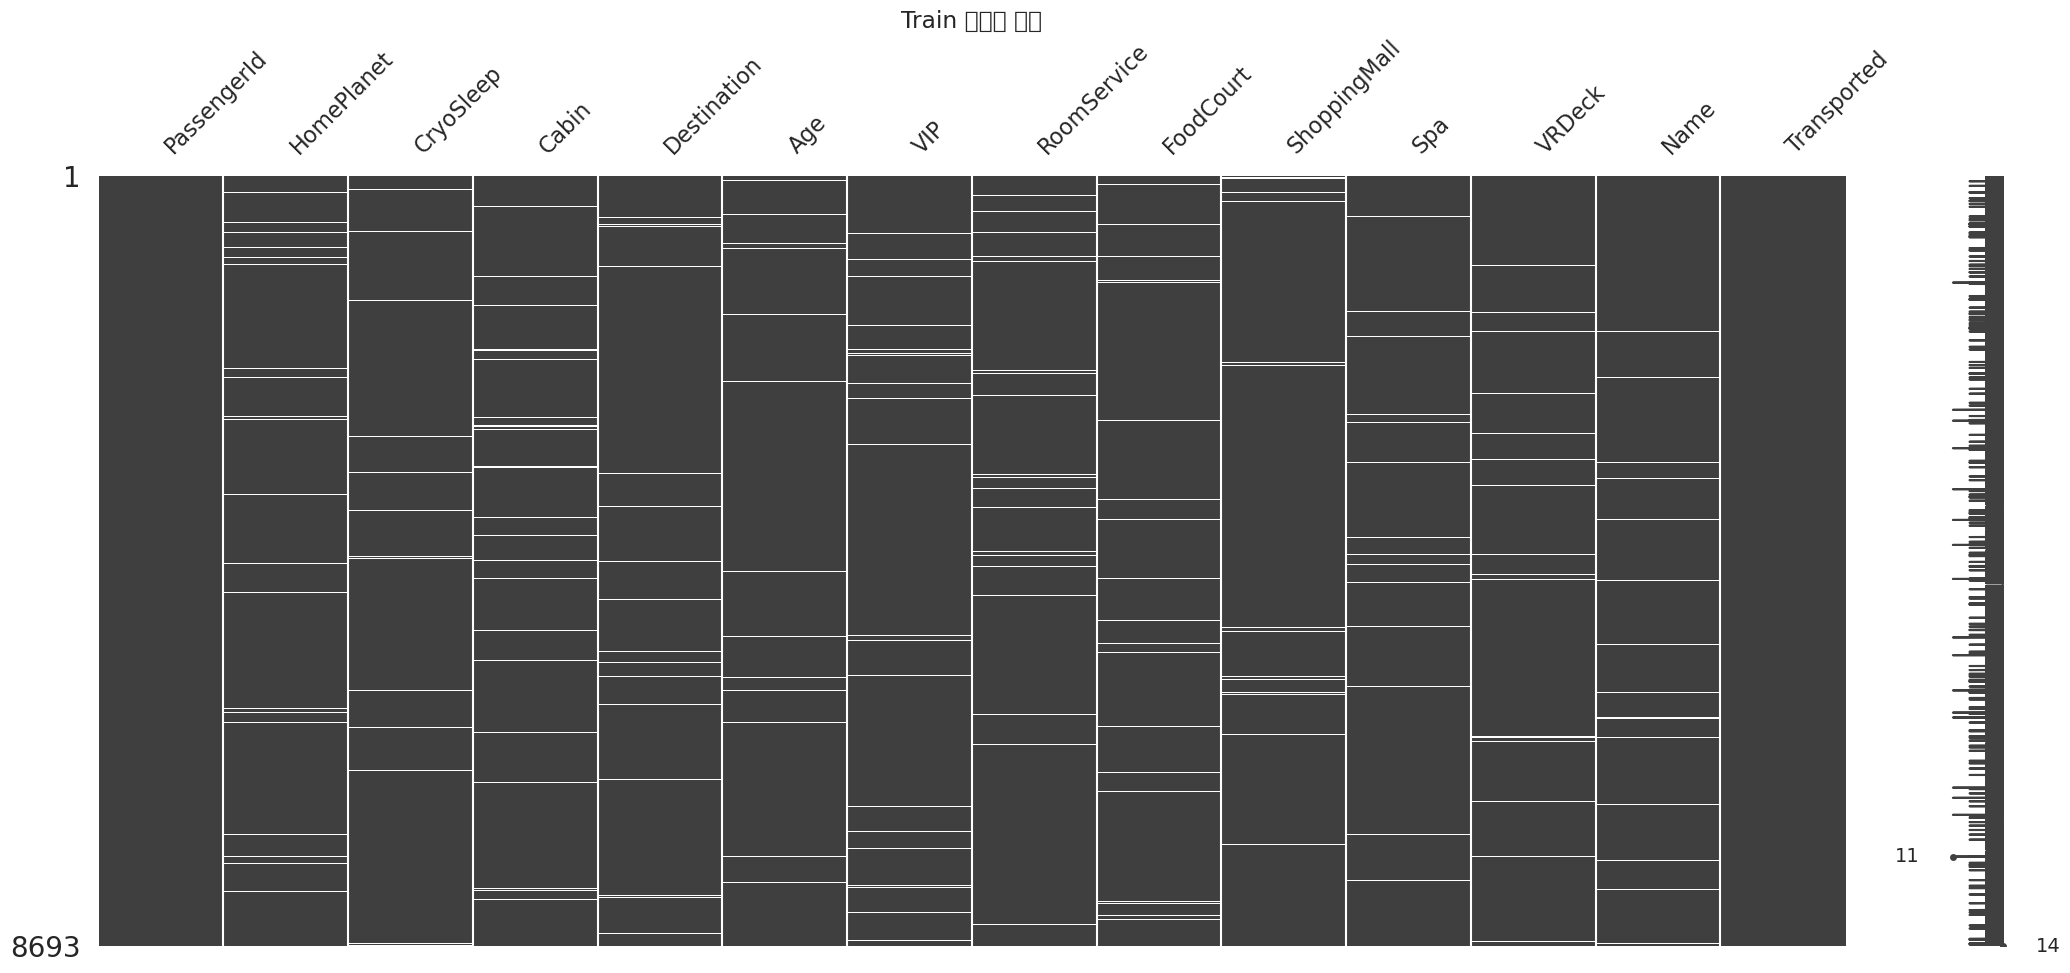

In [22]:
# 결측치 분포 시각화

plt.figure(figsize=(12, 5))
msno.matrix(train)
plt.title("Train 결측치 분포")
plt.show()


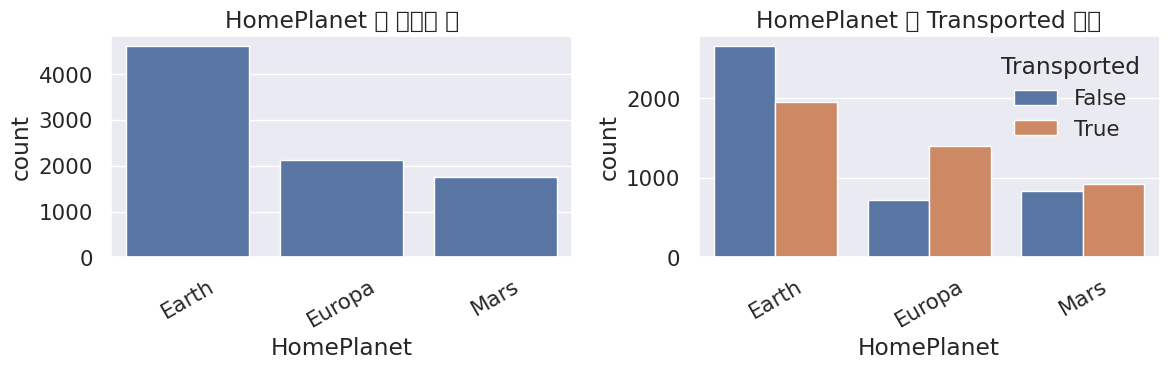

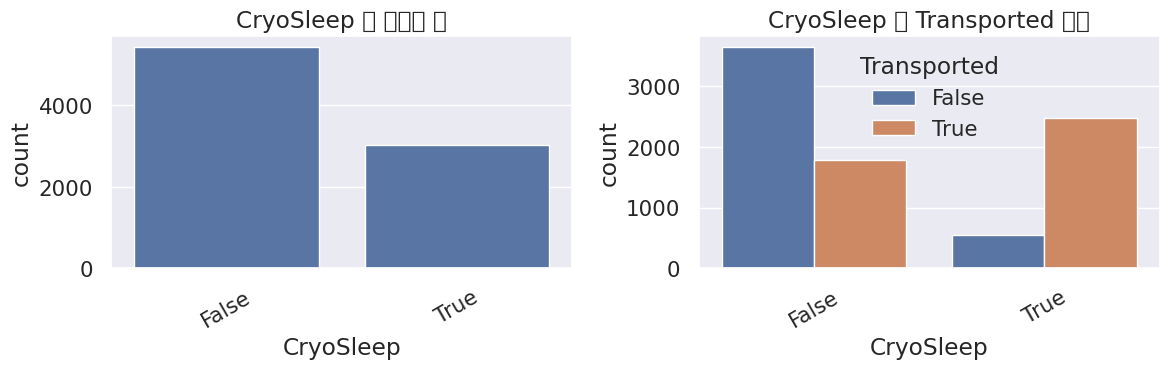

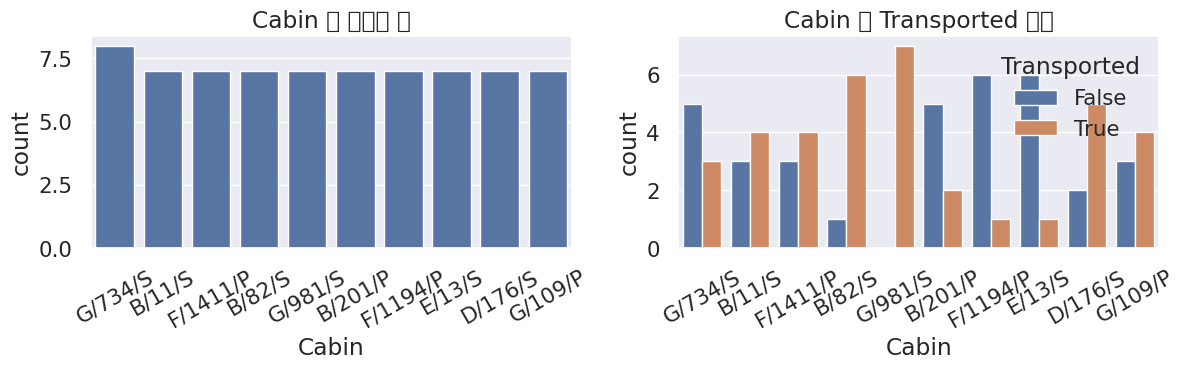

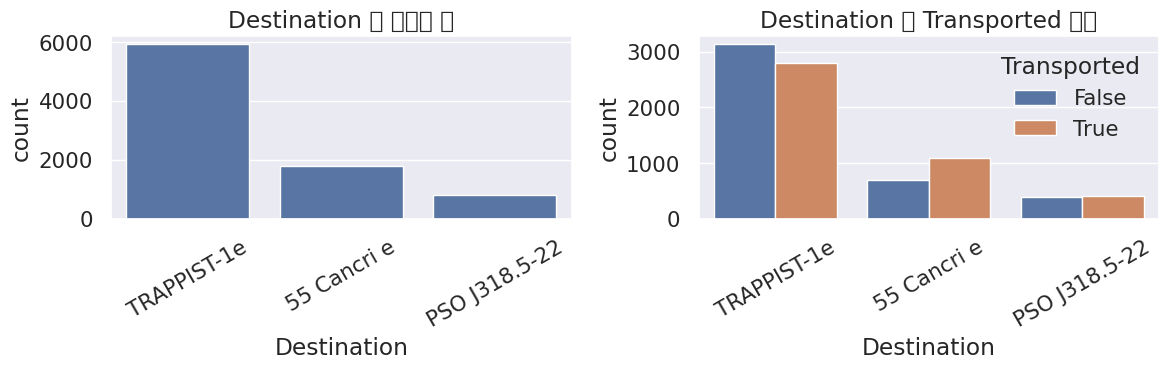

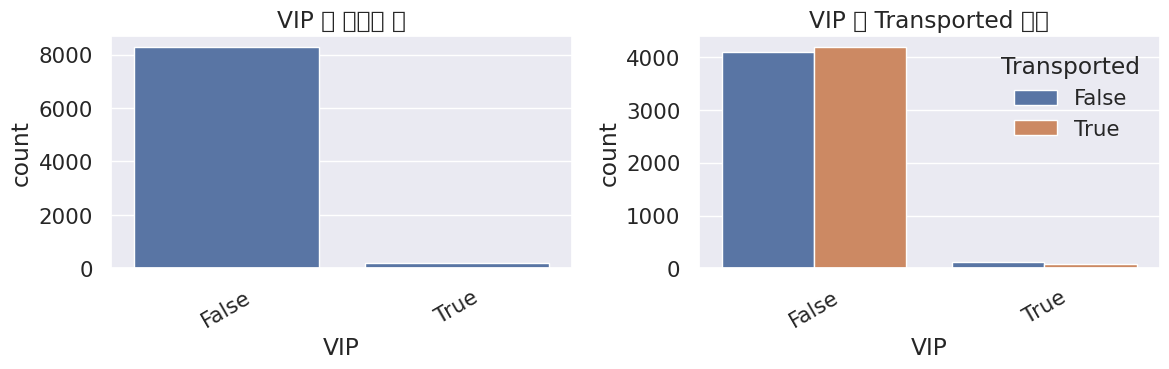

In [23]:
# 범주형 변수

cat_cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]

for col in cat_cols:
    if col not in train.columns:
        continue

    if col == "Cabin":
        order = train[col].value_counts().iloc[:10].index
    else:
        order = train[col].value_counts().index

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)   
    sns.countplot(x=col, data=train, order=order)
    plt.title(f"{col} 별 탑승자 수")
    plt.xticks(rotation=30)
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=col, hue="Transported", data=train,
                  order=order)
    plt.title(f"{col} 별 Transported 여부")
    plt.xticks(rotation=30)
    
    plt.tight_layout()
    plt.show()


In [24]:
# 범주형 변수별 Transported 비율

for col in cat_cols:
    if col not in train.columns:
        continue
    
    print(f"==== {col} ====")
    display(train[[col, "Transported"]]
            .groupby(col)["Transported"]
            .mean()
            .sort_values(ascending=False))


==== HomePlanet ====


HomePlanet
Europa    0.658846
Mars      0.523024
Earth     0.423946
Name: Transported, dtype: float64

==== CryoSleep ====


CryoSleep
True     0.817583
False    0.328921
Name: Transported, dtype: float64

==== Cabin ====


Cabin
G/999/S     1.0
T/3/P       1.0
F/1765/S    1.0
F/1768/P    1.0
F/1769/S    1.0
           ... 
F/1234/S    0.0
F/1209/S    0.0
F/1208/S    0.0
F/1208/P    0.0
F/1218/P    0.0
Name: Transported, Length: 6560, dtype: float64

==== Destination ====


Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64

==== VIP ====


VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64

In [25]:

# 수치형 변수

num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

train[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


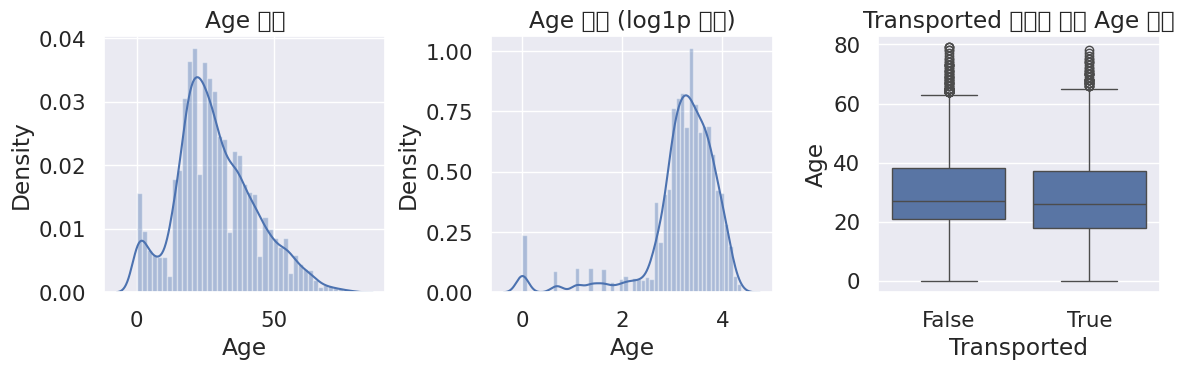

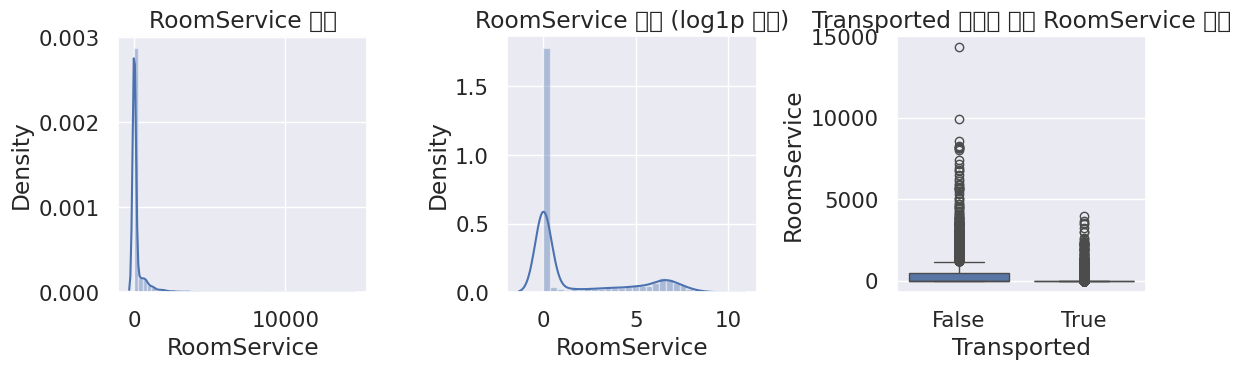

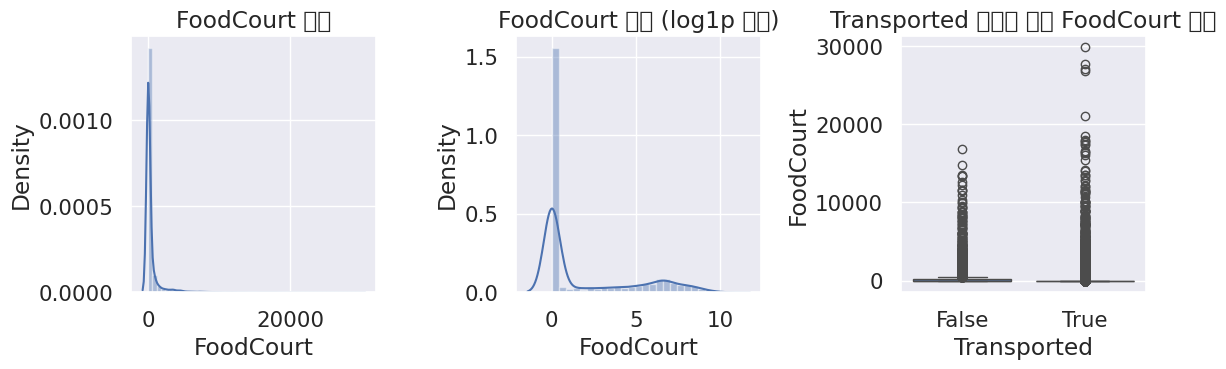

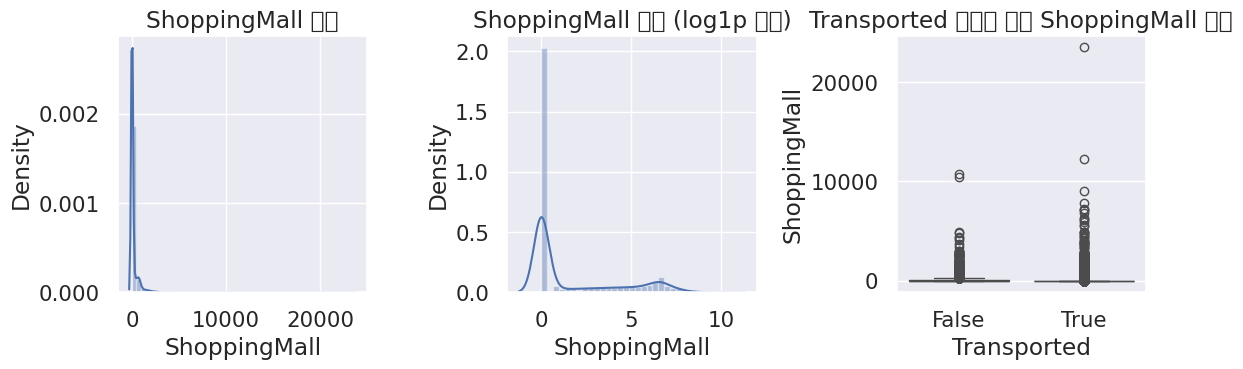

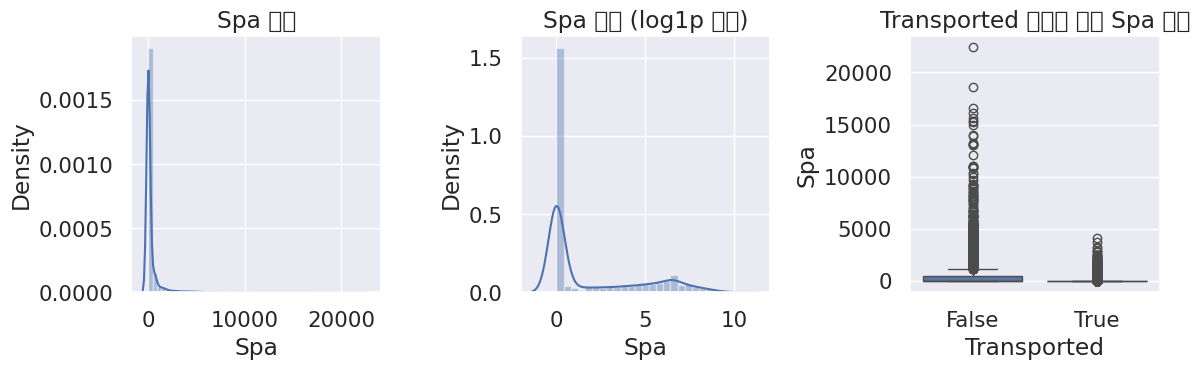

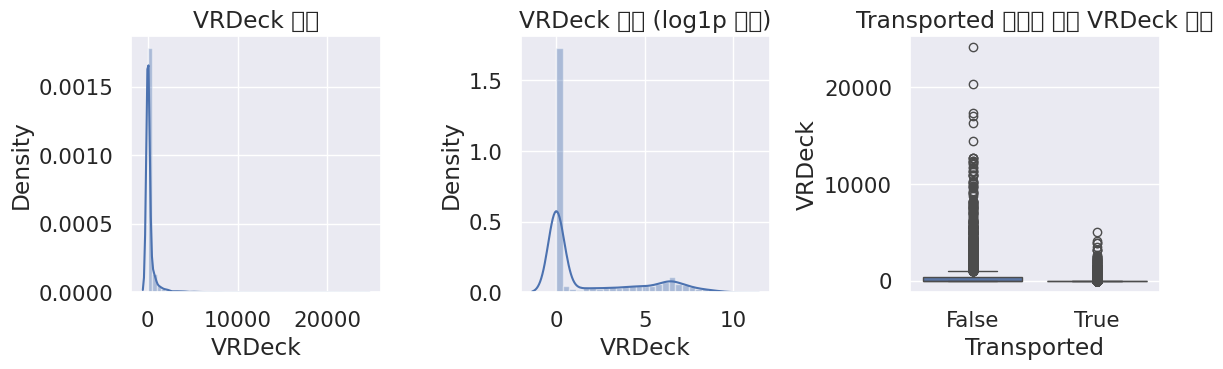

In [26]:

# 각 수치형 변수 분포

for col in num_cols:
    if col not in train.columns:
        continue
    
    plt.figure(figsize=(12, 4))
    
    # 원본
    plt.subplot(1, 3, 1)
    sns.distplot(train[col].dropna(), kde=True)
    plt.title(f"{col} 분포")

    # 로그 변환 분포
    plt.subplot(1, 3, 2)
    sns.distplot(np.log1p(train[col].dropna()), kde=True)
    plt.title(f"{col} 분포 (log1p 변환)")
    
    # 원본 기준 Transported별 boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x="Transported", y=col, data=train)
    plt.title(f"Transported 여부에 따른 {col} 분포")
    
    plt.tight_layout()
    plt.show()


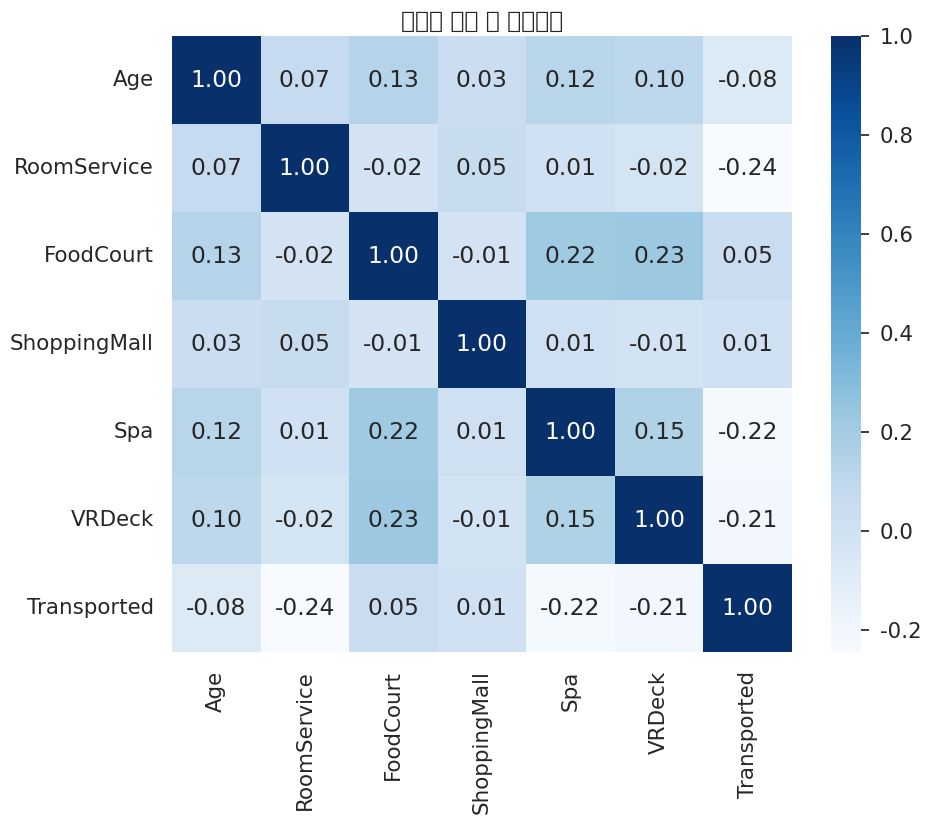

In [27]:
# 상관관계 (수치형)

plt.figure(figsize=(10, 8))
corr = train[num_cols + ["Transported"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("수치형 변수 간 상관관계")
plt.show()

# 수치형 변수 간 뚜렷한 상관관계 없음!

In [28]:
# 원본 보존
df_train = train.copy()
df_test = test.copy()

# Cabin에서 Deck, Num, Side 분리
def split_cabin(df):
    df["Cabin_Deck"] = df["Cabin"].str.split("/").str[0]
    df["Cabin_Num"] = df["Cabin"].str.split("/").str[1]
    df["Cabin_Side"] = df["Cabin"].str.split("/").str[2]
    return df

df_train = split_cabin(df_train)
df_test = split_cabin(df_test)

df_train[["Cabin", "Cabin_Deck", "Cabin_Num", "Cabin_Side"]].head()


,Cabin,Cabin_Deck,Cabin_Num,Cabin_Side
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S


In [29]:
# 가족/그룹 유추용
def create_group_id(df):
    df["GroupId"] = df["PassengerId"].str.split("_").str[0]
    return df

df_train = create_group_id(df_train)
df_test = create_group_id(df_test)

df_train[["PassengerId", "GroupId"]].head()


,PassengerId,GroupId
0,0001_01,0001
1,0002_01,0002
2,0003_01,0003
3,0003_02,0003
4,0004_01,0004


In [30]:
# 총 지출 금액 합계
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

df_train["TotalSpend"] = df_train[spend_cols].sum(axis=1)
df_test["TotalSpend"] = df_test[spend_cols].sum(axis=1)

df_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalSpend"]].head()


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend
0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0,736.0
2,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,303.0,70.0,151.0,565.0,2.0,1091.0


In [31]:
# Age 구간화

def bin_age(x):
    if pd.isnull(x):
        return np.nan
    if x <= 9:
        return "00s"
    elif x <= 19:
        return "10s"
    elif x <= 29:
        return "20s"
    elif x <= 39:
        return "30s"
    else:
        return "40x"

df_train["AgeBin"] = df_train["Age"].apply(bin_age)
df_test["AgeBin"] = df_test["Age"].apply(bin_age)

df_train[["Age", "AgeBin"]].head()


,Age,AgeBin
0,39.0,30s
1,24.0,20s
2,58.0,40x
3,33.0,30s
4,16.0,10s


In [32]:
# 결측치 처리
# 수치형: 중앙값, 범주형: 최빈값

from sklearn.impute import SimpleImputer

all_cat_cols = ["HomePlanet", "CryoSleep", "Cabin_Deck", "Cabin_Side",
                "Destination", "VIP", "AgeBin", "GroupId"]

all_num_cols = ["Age", "RoomService", "FoodCourt",
                "ShoppingMall", "Spa", "VRDeck", "TotalSpend"]

for col in all_cat_cols:
    if col not in df_train.columns:
        continue
    imputer = SimpleImputer(strategy="most_frequent")
    df_train[col] = imputer.fit_transform(df_train[[col]]).ravel()
    df_test[col]  = imputer.transform(df_test[[col]]).ravel()

for col in all_num_cols:
    if col not in df_train.columns:
        continue
    imputer = SimpleImputer(strategy="median")
    df_train[col] = imputer.fit_transform(df_train[[col]]).ravel()
    df_test[col]  = imputer.transform(df_test[[col]]).ravel()


In [33]:
# 사용 Feature 선택
features = all_cat_cols + all_num_cols

X = df_train[features]
y = df_train["Transported"].astype(int)  # True/False -> 1/0

X_test = df_test[features]

# 원-핫 인코딩
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

# train/test 컬럼 정렬
X, X_test = X.align(X_test, join="left", axis=1)
X_test = X_test.fillna(0)

X.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,GroupId_9267,GroupId_9268,GroupId_9270,GroupId_9272,GroupId_9274,GroupId_9275,GroupId_9276,GroupId_9278,GroupId_9279,GroupId_9280
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
# RandomForest
"""
- 전처리에 관대함
- 비선형·복잡한 패턴도 학습 무난
- 기본값으로도 좋은 성능
- 과적합에 비교적 강함
"""

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_tr, y_tr)

pred_val = clf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, pred_val))
print(classification_report(y_val, pred_val))


Validation Accuracy: 0.79700977573318
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       863
           1       0.83      0.75      0.79       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [35]:
test_pred = clf.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Transported": test_pred.astype(bool)
})

submission.head()


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [36]:
submission.to_csv("submission.csv", index=False)
print("submission.csv 저장 완료")


submission.csv 저장 완료


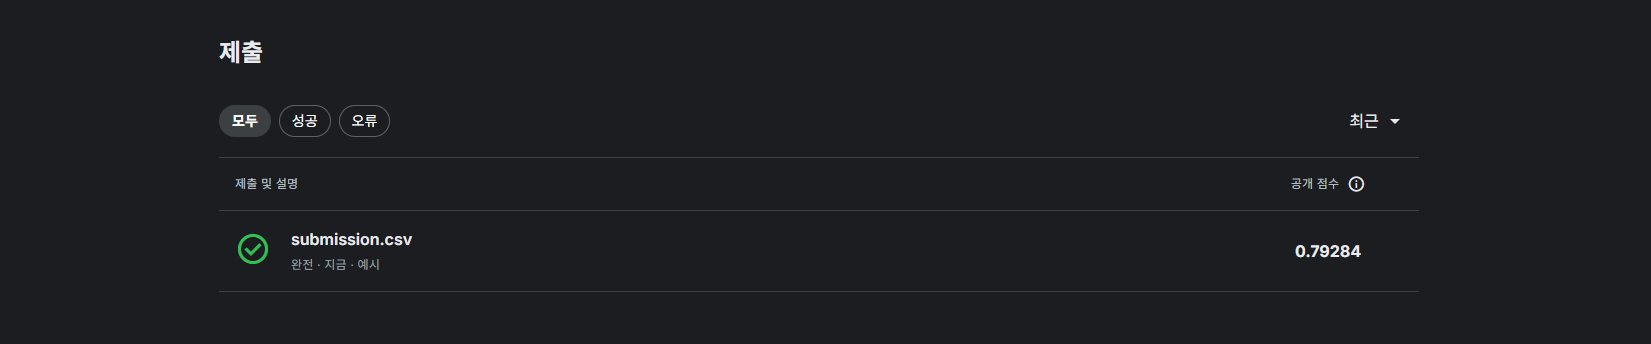